In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  2. Data preperation

In [2]:
%load_ext autoreload
%aimport data_prep
%run data_prep.py
%autoreload 1

### Load Datasets & Join both Datasets

In [3]:
train_data = pd.read_csv("original_datasets/training_set_values.csv")
train_labels = pd.read_csv("original_datasets/training_set_labels.csv")
test_data = pd.read_csv("original_datasets/test_set_values.csv")

#Join Labels with Train data
train_data = addLabelToTrainData(train_data, train_labels)
test_data['status_group'] = 'test'
#test_data.insert(0, 'My 2nd new column', 'default value 2')
train_data['is_test'] = 0
test_data['is_test'] = 1

data = pd.concat([train_data,test_data],ignore_index=True)
data.to_csv('./original_datasets/initial_joined.csv', index=False)

`status_group` added to train_data 



## Start Transformoing on a copy

In [4]:
data_transformed = data.copy()

In [5]:
#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "gps_height")
data_transformed.to_csv("./FE_steps/6 train_data_gps_height_ONLY_imputed.csv", index=False)
data_transformed = data.copy()

gps_height imputed with mean


In [6]:
#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "longitude")
data_transformed = impute_column(data_transformed, "latitude")
data_transformed = distance_capital(data_transformed)
data_transformed.to_csv("./FE_steps/7 train_data_capital_ONLY.csv", index=False)
data_transformed = data.copy()


longitude imputed with mean
latitude imputed with mean
added distance to capital


### Impute Values 

Impute for Train

In [7]:
# Impute 0 for regions of 'Dodoma','Kagera','Mbeya','Tabora' this regions 0 ar actually missing values
data_transformed = amount_tsh_impute_regions(data_transformed)

amount_tsh imputed with mean for regions: ['Dodoma','Kagera','Mbeya','Tabora']


In [8]:
#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "latitude")


latitude imputed with mean


In [9]:
#Impute Longitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "longitude")

longitude imputed with mean


In [10]:
#Impute Population by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "population")


population imputed with mean


In [11]:
data_transformed = impute_column(data_transformed, "gps_height")

gps_height imputed with mean


<p style="color:red;"> -------------------------- CHECKPOINT</p>
<p style="color:red;"> -------------------------- SAVE to FE folder</p>


In [12]:
data_transformed.to_csv("./FE_steps/1 train_data_imputed.csv", index=False)

In [13]:
data_transformed = pd.read_csv("./FE_steps/1 train_data_imputed.csv")
data_transformed_without_impute = data.copy()

### Add Outside Data

In [14]:
data_transformed = density(data_transformed)
data_transformed_without_impute = density(data_transformed_without_impute)

added density
added density


### Conversions
#### Compute `age` from `construction_year` 

In [15]:
# construction_year - converts it to years elapsed (AKA age) -- (zeroes ignored)
data_transformed = convert_construction_year(data_transformed)
data_transformed_without_impute = convert_construction_year(data_transformed_without_impute)

`construction_year` converted to `age`, which is elapsed years (zeroes ignored) 

`construction_year` converted to `age`, which is elapsed years (zeroes ignored) 



In [16]:
# age imputed with mean of rows with same extraction_type
data_transformed = impute_age(data_transformed)
data_transformed_without_impute = impute_age(data_transformed_without_impute)

`age` imputed with mean of rows with same extraction_type  

`age` imputed with mean of rows with same extraction_type  



<p style="color:red;"> -------------------------- CHECKPOINT</p>
<p style="color:red;"> -------------------------- SAVE to FE folder</p>


In [17]:
data_transformed.to_csv("./FE_steps/2 train_data_impute_age_dayse_recorded_density.csv", index=False)
data_transformed_without_impute.to_csv("./FE_steps/3 train_data_NOIMPUTE_age_dayse_recorded_density.csv", index=False)

In [18]:
data_transformed = pd.read_csv("./FE_steps/2 train_data_impute_age_dayse_recorded_density.csv")
data_transformed_without_impute = pd.read_csv("./FE_steps/3 train_data_NOIMPUTE_age_dayse_recorded_density.csv")

### ADD `days_since_recoreded`

In [19]:
data_transformed_without_impute = convert_date_recorded(data_transformed_without_impute)

`date_recorded` converted to `days_since_recoreded`, which is elapsed days (zeroes ignored) 



### Binning

Try one iteration without binning

In [20]:
data_transformed_without_impute = bin_feature(data_transformed_without_impute, "days_since_recoreded", 8)

`days_since_recoreded` has been binned to 8 categories:
IntervalIndex([(1923.999, 2196.0], (2196.0, 2221.0], (2221.0, 2241.0], (2241.0, 2343.0], (2343.0, 2790.0], (2790.0, 2901.0], (2901.0, 2920.0], (2920.0, 6559.0]]
              closed='right',
              dtype='interval[float64]')




Text(0, 0.5, 'Percentage')

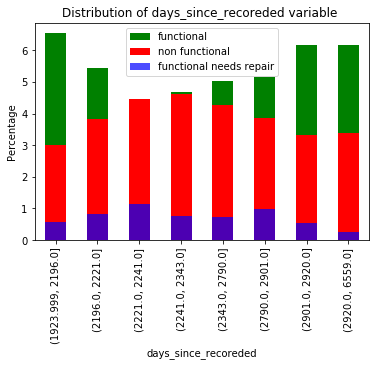

In [21]:
plt.pyplot.show()
ax = ((data_transformed_without_impute[data_transformed_without_impute.status_group=='functional'].days_since_recoreded.value_counts().sort_index()/len(data_transformed_without_impute.status_group))*100).plot(kind='bar',color='g', x='days_since_recoreded')
((data_transformed_without_impute[data_transformed_without_impute.status_group=='non functional'].days_since_recoreded.value_counts().sort_index()/len(data_transformed_without_impute.status_group))*100).plot(kind='bar',color='r', x='days_since_recoreded')
((data_transformed_without_impute[data_transformed_without_impute.status_group=='functional needs repair'].days_since_recoreded.value_counts().sort_index()/len(data_transformed_without_impute.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='days_since_recoreded')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of days_since_recoreded variable ')
plt.pyplot.xlabel('days_since_recoreded')
plt.pyplot.ylabel('Percentage')

### Add distance to capital

In [22]:
data_transformed_without_impute = distance_capital(data_transformed_without_impute)

added distance to capital


<p style="color:red;"> -------------------------- CHECKPOINT</p>
<p style="color:red;"> -------------------------- SAVE to FE folder</p>


In [23]:
data_transformed_without_impute.to_csv("FE_steps/4 train_data_NOIMPUTE_age_dayse_recorded_density_capital.csv", index=False)

In [24]:
data_transformed_without_impute = pd.read_csv("FE_steps/4 train_data_NOIMPUTE_age_dayse_recorded_density_capital.csv")

### Shortlisting columns

Shortlist Trainning set columns

In [25]:
# installer
data_transformed_without_impute = shortlist_installer(data_transformed_without_impute)

# funder
data_transformed_without_impute = shortlist_funder(data_transformed_without_impute)

# lga
data_transformed_without_impute = shortlist_lga(data_transformed_without_impute)

# extraction_type
data_transformed_without_impute = shortlist_extraction_type(data_transformed_without_impute)

#scheme_management
data_transformed_without_impute = shortlist_scheme_management(data_transformed_without_impute)

#region_code
data_transformed_without_impute = shortlist_region_code(data_transformed_without_impute)

`installer` shortlisted to {'Commu', 'DANIDA', 'DWE', 'Government', 'RWE', 'other'} only 

`funder` shortlisted to {'Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef','Tasaf','District Council', 'other'} only 

`lga` shortlisted to {'Njombe','Arusha Rural','Moshi Rural','Bariadi','Rungwe','Kilosa','Kasulu','Mbozi','Meru','Bagamoyo', 'other'} only 

`extraction_type` shortlisted to {'gravity','nira/tanira','submersible','swn 80','mono','india mark ii','afridev','ksb', 'other'} only 

`scheme_management` shortlisted to {'VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company', 'other'} only 

`region_code` shortlisted to {11,17,12,3,5,18,19,2,16,10,4,1,13,14,20, 'other'} only 



<p style="color:red;"> -------------------------- CHECKPOINT</p>
<p style="color:red;"> -------------------------- SAVE to FE folder</p>

In [26]:
data_transformed_without_impute.to_csv("FE_steps/5 train_data_NOIMPUTE_age_dayse_recorded_density_capital_SHORTLISTING.csv", index=False)

In [27]:
data_transformed_without_impute = pd.read_csv("FE_steps/5 train_data_NOIMPUTE_age_dayse_recorded_density_capital_SHORTLISTING.csv")

# Correlation matrix

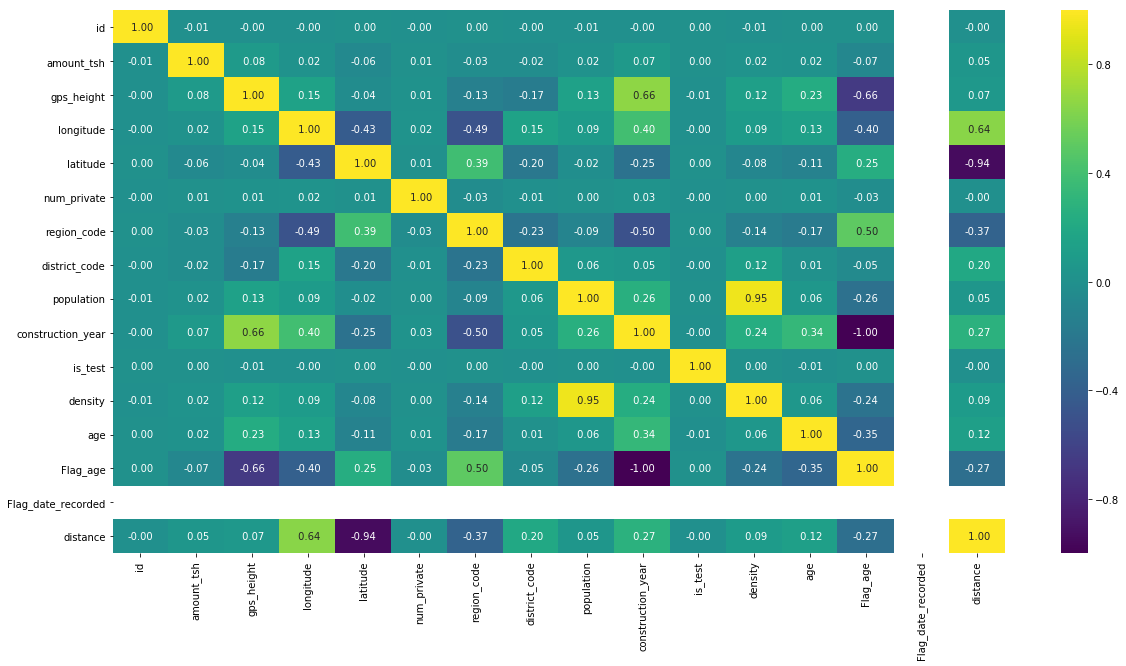

In [28]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(data_transformed_without_impute.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

#  Save Data

In [29]:
#train_data_transformed.status_group.replace(['functional', 'non functional','functional needs repair'], [1, 2, 3], inplace=True)
data_transformed_without_impute = data_transformed_without_impute.drop(columns=["status_group"])

#train_data_transformed = onehot_encode(train_data_transformed)
data_transformed_without_impute.to_csv("./FE_Final/train_data_prepared.csv", index=False)